<a href="https://colab.research.google.com/github/Itsdevanand/NLP/blob/main/Flipkart%20Review%20Scrapping%20and%20Building%20Wordclouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
import numpy as np


In [3]:
#Scrapping Reviews From Flipkart 
reviews = []
for i in range(1,10):
    response = requests.get('https://www.flipkart.com/oneplus-bullets-wireless-z-bass-bluetooth-headset/product-reviews/itmc804703e0785e?pid=ACCFVA3KZ2EYMYX3&lid=LSTACCFVA3KZ2EYMYX3C5TCKH&marketplace=FLIPKART&page='+str(i))
    soup = bs(response.text,"html.parser")
    
    rev = soup.find_all('div',{'class':'t-ZTKy'})
    
    
    for item in rev:
        c = item.find('div', {'class':''}).text
        reviews.append(c)

In [4]:
#Joining Reviews
formated_text = ''.join(reviews)
formated_text = re.sub('[^A-Za-z" "]+'," ", formated_text).lower()
formated_text = re.sub('[0-9" "]+', " ", formated_text)

In [24]:
#Importing Stop Words
import nltk
nltk.download('stopwords')


# Using the stopwords.
from nltk.corpus import stopwords

# Initialize the stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
#Tokenzing words
from nltk import word_tokenize

words = word_tokenize(formated_text)

# = stopwords.words('English')
stop_words.extend(['one', 'plus', 'oneplus', 'headset']) #adding some words in stopwords
words = [word for word in words if word not in stop_words]

In [26]:
text = ' '.join(words)

In [30]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer  
lem = WordNetLemmatizer()

words1 = [lem.lemmatize(word) for word in words]  #lematization 
text = ' '.join(words1)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


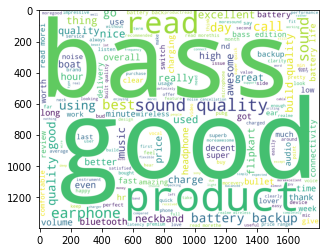

In [32]:
import matplotlib.pyplot as plt

#unigram word cloud
from wordcloud import WordCloud
wordcloud_ip = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(text)

plt.imshow(wordcloud_ip)

In [33]:
from textblob import TextBlob 

b = TextBlob(text)  #sentiment analysis using textblob

b.sentiment #viewing sentiments

Sentiment(polarity=0.34232706410285707, subjectivity=0.5423056294088048)

In [34]:
#generating bigram
bigrams_list = list(nltk.bigrams(words1))
dictionary2 = [' '.join(t) for t in bigrams_list]
print (dictionary2)

['first product', 'product love', 'love superb', 'superb sound', 'sound quality', 'quality build', 'build great', 'great yeah', 'yeah enjoying', 'enjoying music', 'music alot', 'alot read', 'read moregood', 'moregood battery', 'battery sound', 'sound awesome', 'awesome bass', 'bass super', 'super overall', 'overall good', 'good product', 'product plusread', 'plusread morei', 'morei using', 'using product', 'product last', 'last day', 'day might', 'might early', 'early write', 'write elaborate', 'elaborate review', 'review known', 'known enough', 'enough neckband', 'neckband eligible', 'eligible sound', 'sound quality', 'quality driver', 'driver definitely', 'definitely produce', 'produce balanced', 'balanced sound', 'sound surely', 'surely going', 'going satisfy', 'satisfy people', 'people including', 'including whether', 'whether mid', 'mid frequency', 'frequency vocal', 'vocal high', 'high frequency', 'frequency treble', 'treble even', 'even lower', 'lower frequency', 'frequency neck

In [35]:
#Count vectorizer

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_


sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

vectorizer.vocabulary_.items()
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_dict = dict(words_freq)

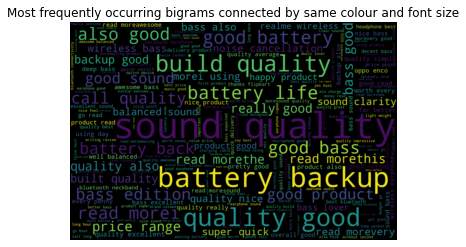

In [36]:
from wordcloud import WordCloud

#   BIgram wordcloud

WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=stopwords)
wordCloud.generate_from_frequencies(words_dict)



plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()